In [1]:
import os
import pandas as pd
from __future__ import print_function, division
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics

### Data Description

In [2]:
pd.set_option('display.max_columns', None)
fname = os.path.join("",
                     "WA_Fn-UseC_-HR-Employee-Attrition.csv")

employee_attr = pd.read_csv(fname)

employee_attr

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

#### Dataset Variable Descriptions

1. AGE	Numerical Value
2. ATTRITION	Employee leaving the company (0=no, 1=yes)
3. BUSINESS TRAVEL	(1=No Travel, 2=Travel Frequently, 3=Travel Rarely)
4. DAILY RATE	Numerical Value - Salary Level
5. DEPARTMENT	(1=HR, 2=R&D, 3=Sales)
6. DISTANCE FROM HOME	Numerical Value - THE DISTANCE FROM WORK TO HOME
7. EDUCATION	Numerical Value
8. EDUCATION FIELD	(1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL)
9. EMPLOYEE COUNT	Numerical Value
10. EMPLOYEE NUMBER	Numerical Value - EMPLOYEE ID
11. ENVIROMENT SATISFACTION	Numerical Value - SATISFACTION WITH THE ENVIROMENT
12. GENDER	(1=FEMALE, 2=MALE)
13. HOURLY RATE	Numerical Value - HOURLY SALARY
14. JOB INVOLVEMENT	Numerical Value - JOB INVOLVEMENT
15. JOB LEVEL	Numerical Value - LEVEL OF JOB
16. JOB ROLE	(1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE)
17. JOB SATISFACTION	Numerical Value - SATISFACTION WITH THE JOB
18. MARITAL STATUS	(1=DIVORCED, 2=MARRIED, 3=SINGLE)
19. MONTHLY INCOME	Numerical Value - MONTHLY SALARY
20. MONTHY RATE	Numerical Value - MONTHY RATE
21. NUMCOMPANIES WORKED	Numerical Value - NO. OF COMPANIES WORKED AT
22. OVER 18	(1=YES, 2=NO)
23. OVERTIME	(1=NO, 2=YES)
24. PERCENT SALARY HIKE	Numerical Value - PERCENTAGE INCREASE IN SALARY
25. PERFORMANCE RATING	Numerical Value - PERFORMANCE RATING
26. RELATIONS SATISFACTION	Numerical Value - RELATIONS SATISFACTION
27. STANDARD HOURS	Numerical Value - STANDARD HOURS
28. STOCK OPTIONS LEVEL	Numerical Value - STOCK OPTIONS
29. TOTAL WORKING YEARS	Numerical Value - TOTAL YEARS WORKED
30. TRAINING TIMES LAST YEAR	Numerical Value - HOURS SPENT TRAINING
31. WORK LIFE BALANCE	Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE
32. YEARS AT COMPANY	Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY
33. YEARS IN CURRENT ROLE	Numerical Value -YEARS IN CURRENT ROLE
34. YEARS SINCE LAST PROMOTION	Numerical Value - LAST PROMOTION
35. YEARS WITH CURRENT MANAGER	Numerical Value - YEARS SPENT WITH CURRENT MANAGER

Checking the data types

In [3]:
#Describing each field in the dataset
employee_attr.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

Age
- Min: 18
- Max: 60
- Mean ~37

I am considering taking out the records for employees that are 18-years-old. In most situations, companies don't hire people this young unless it is for internships or possibly co-op work. I would think that these employees are more likely to leave a company anyway because they have to go back to school or they find another learning opportunity, etc. There are 8 employees that are of age 18 out of 1,470 so it would not affect the statistics to either leave them in or take them out though. 

Also, I think most people start their careers after graduating college around age 22-23, so I think I will subset the sample to remove those ages to focus on the employees that are working full-time at the company and have their undergraduate degrees at least. I want the dataset to be more representative of the typical career path. 

Daily Rate pertains to the salary level of an employee .. I don't think this field will give us as much information as hourly rate or monthly rate, so I am going to remove it. 

Standard hours is the same value for every employee. 80 hours itself is a lot of time to work for the average employee, so these employees could all possibly be overworked and that could play into attrition as well :) but given that they all work the same amount, the column is not very useful. I am also taking out Employee Count for the same reason.

There are many "years" variables: total working years, training times last year, years at company, years in current role, years since last promotion, and years with current manager. I honestly think they are all helpful to our question of what are the dominant factors for why employees choose to leave a company? They all represent different things for the employee and could play key roles in the analysis of the question.

For Education Field, I think it is very common these days that people don't necessarily work in the field that they majored in. With that, I am going to drop this column as it doesn't seem extremely relevant to the problem of attrition.

Over 18 and OverTime binary variables (Yes/No)
- Since I am considering removing the employees of age 18, this variable would not be useful (Over18).
- OverTime -- everyone has to work overtime eventually and since there's not numerical variables showing how many hours of overtime or count of instances of overtime, it really doesn't describe much. 

I am assuming that the employees represented in this dataset are full-time employees, which means that the rate variables would not be as significant as understanding their yearly incomes or salaries. Therefore, I am going to drop the 'rate' columns. 

### Data Transformations

In [4]:
#Removing unnecessary columns
#employee_attr = employee_attr.drop(['EducationField','Over18','OverTime'], 1)
#employee_attr = employee_attr.drop('MonthlyRate',1)
#employee_attr = employee_attr.drop(['EmployeeCount','StandardHours'],1)
#employee_attr = employee_attr.drop('DailyRate',1)
employee_attr = employee_attr.drop(['HourlyRate','MonthlyRate','EducationField','Over18','OverTime','EmployeeCount','StandardHours','DailyRate'],1)
employee_attr

C:\Users\phill\AppData\Local\Temp/ipykernel_171628/3340482261.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  employee_attr = employee_attr.drop(['HourlyRate','MonthlyRate','EducationField','Over18','OverTime','EmployeeCount','StandardHours','DailyRate'],1)


Age Attrition     BusinessTravel              Department  \
0      41       Yes      Travel_Rarely                   Sales   
1      49        No  Travel_Frequently  Research & Development   
2      37       Yes      Travel_Rarely  Research & Development   
3      33        No  Travel_Frequently  Research & Development   
4      27        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
1465   36        No  Travel_Frequently  Research & Development   
1466   39        No      Travel_Rarely  Research & Development   
1467   27        No      Travel_Rarely  Research & Development   
1468   49        No  Travel_Frequently                   Sales   
1469   34        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education  EmployeeNumber  EnvironmentSatisfaction  \
0                    1          2               1                        2   
1                    8          1               2                        3   
2                    2          2               4                        4   
3                    3          4               5                        4   
4                    2          1               7                        1   
...                ...        ...             ...                      ...   
1465                23          2            2061                        3   
1466                 6          1            2062                        4   
1467                 4          3            2064                        2   
1468                 2          3            2065                        4   
1469                 8          3            2068                        2   

      Gender  JobInvolvement  JobLevel                    JobRole  \
0     Female               3         2            Sales Executive   
1       Male               2         2         Research Scientist   
2       Male               2         1      Laboratory Technician   
3     Female               3         1         Research Scientist   
4       Male               3         1      Laboratory Technician   
...      ...             ...       ...                        ...   
1465    Male               4         2      Laboratory Technician   
1466    Male               2         3  Healthcare Representative   
1467    Male               4         2     Manufacturing Director   
1468    Male               2         2            Sales Executive   
1469    Male               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0                   4        Single           5993                   8   
1                   2       Married           5130                   1   
2                   3        Single           2090                   6   
3                   3       Married           2909                   1   
4                   2       Married           3468                   9   
...               ...           ...            ...                 ...   
1465                4       Married           2571                   4   
1466                1       Married           9991                   4   
1467                2       Married           6142                   1   
1468                2       Married           5390                   2   
1469                3       Married           4404                   2   

      PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                    11                  3                         1   
1                    23                  4                         4   
2                    15                  3                         2   
3                    11                  3                         3   
4                    12                  3                         4   
...                 ...                ...                       ...   
1465                 17                  3            

In [5]:
employee_attr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [6]:
#Adding new column for yearly salary to dataset
employee_attr['YearlyIncome'] = employee_attr['MonthlyIncome'] *12
employee_attr[['MonthlyIncome','YearlyIncome']].head()

MonthlyIncome  YearlyIncome
0           5993         71916
1           5130         61560
2           2090         25080
3           2909         34908
4           3468         41616

In [7]:
# Rows containing duplicate data -- none!
duplicate_rows_df = employee_attr[employee_attr.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

# Finding the null values -- also none!
print("\nNull values")
print(employee_attr.isnull().sum())

number of duplicate rows:  (0, 28)

Null values
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
YearlyIncome                0
dtype: int64


### Histograms

#### Histogram of Age

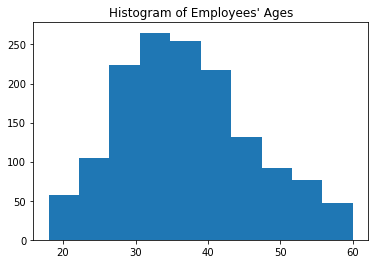

In [8]:
plt.hist(employee_attr['Age'],bins=10)
plt.title("Histogram of Employees' Ages")
plt.show() 

The distribution of age for the entire dataset is relatively normal and slightly left-skewed (not drastic). The ages from 18-21 are quite young for employees at a company, as usually companies hire people with undergraduate degrees and most people graduate from college at age 22 or 23. I am going to remove this population from the dataset to more align with the dataset with normal working ages at a company.

#### Histogram of Yearly Income and Monthly Income

In [9]:
#No missing values in the new column
employee_attr.YearlyIncome.isnull().sum()

0

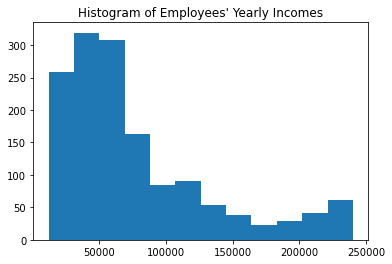

In [10]:
plt.hist(employee_attr['YearlyIncome'],bins=12)
plt.title("Histogram of Employees' Yearly Incomes")
plt.show() 

In [11]:
#calculating the median income among the employees
income_med = statistics.median(employee_attr['YearlyIncome'])
print("Median Employee Yearly Income: $",income_med)

Median Employee Yearly Income: $ 59028.0


In [12]:
#Analyzing outliers from yearly income analysis
#less than $100,000
reg_income = employee_attr[employee_attr.YearlyIncome < 100000]
reg_income.shape

(1100, 28)

In [13]:
#high income = greater than $100,000
high_income = employee_attr[employee_attr.YearlyIncome > 100000]
high_income.shape

(370, 28)

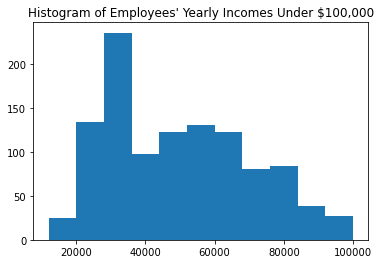

In [14]:
plt.hist(reg_income['YearlyIncome'],bins=11)
plt.title("Histogram of Employees' Yearly Incomes Under $100,000")
plt.show() 

The distribution for yearly incomes looks more normally-distributed once the above $100,000 values are removed from the dataset (subsetted).

#### Histogram of distance from home

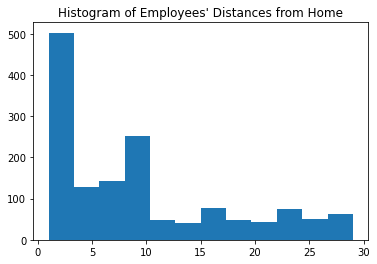

In [15]:
plt.hist(employee_attr['DistanceFromHome'],bins=12)
plt.title("Histogram of Employees' Distances from Home")
plt.show() 

- Left-skewed distribution
- The IBM office for most employees is relatively close to their homes, less than ~3 miles
- There are a bunch of different distances though which could factor into how long someone wants to stay at a job if their commute becomes too time-consuming to have work-life balance

#### Histogram of NumCompanies Worked and PercentSalaryHike

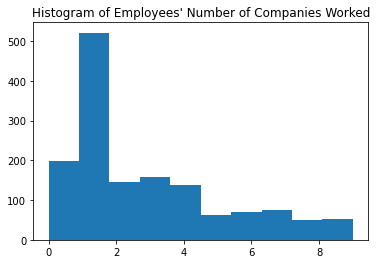

In [16]:
plt.hist(employee_attr['NumCompaniesWorked'],bins=10)
plt.title("Histogram of Employees' Number of Companies Worked")
plt.show() 

In [17]:
#Removing employees with zero companies worked at -- doesn't make any sense when they are working at IBM
employee_attr = employee_attr[employee_attr.NumCompaniesWorked > 0]
employee_attr

Age Attrition     BusinessTravel              Department  \
0      41       Yes      Travel_Rarely                   Sales   
1      49        No  Travel_Frequently  Research & Development   
2      37       Yes      Travel_Rarely  Research & Development   
3      33        No  Travel_Frequently  Research & Development   
4      27        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
1465   36        No  Travel_Frequently  Research & Development   
1466   39        No      Travel_Rarely  Research & Development   
1467   27        No      Travel_Rarely  Research & Development   
1468   49        No  Travel_Frequently                   Sales   
1469   34        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education  EmployeeNumber  EnvironmentSatisfaction  \
0                    1          2               1                        2   
1                    8          1               2                        3   
2                    2          2               4                        4   
3                    3          4               5                        4   
4                    2          1               7                        1   
...                ...        ...             ...                      ...   
1465                23          2            2061                        3   
1466                 6          1            2062                        4   
1467                 4          3            2064                        2   
1468                 2          3            2065                        4   
1469                 8          3            2068                        2   

      Gender  JobInvolvement  JobLevel                    JobRole  \
0     Female               3         2            Sales Executive   
1       Male               2         2         Research Scientist   
2       Male               2         1      Laboratory Technician   
3     Female               3         1         Research Scientist   
4       Male               3         1      Laboratory Technician   
...      ...             ...       ...                        ...   
1465    Male               4         2      Laboratory Technician   
1466    Male               2         3  Healthcare Representative   
1467    Male               4         2     Manufacturing Director   
1468    Male               2         2            Sales Executive   
1469    Male               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0                   4        Single           5993                   8   
1                   2       Married           5130                   1   
2                   3        Single           2090                   6   
3                   3       Married           2909                   1   
4                   2       Married           3468                   9   
...               ...           ...            ...                 ...   
1465                4       Married           2571                   4   
1466                1       Married           9991                   4   
1467                2       Married           6142                   1   
1468                2       Married           5390                   2   
1469                3       Married           4404                   2   

      PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                    11                  3                         1   
1                    23                  4                         4   
2                    15                  3                         2   
3                    11                  3                         3   
4                    12                  3                         4   
...                 ...                ...                       ...   
1465                 17                  3            

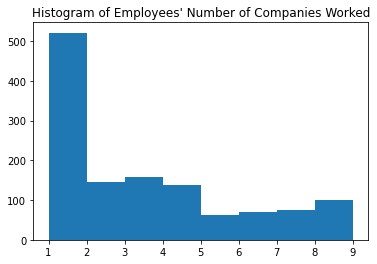

In [18]:
plt.hist(employee_attr['NumCompaniesWorked'],bins=8)
plt.title("Histogram of Employees' Number of Companies Worked")
plt.show() 

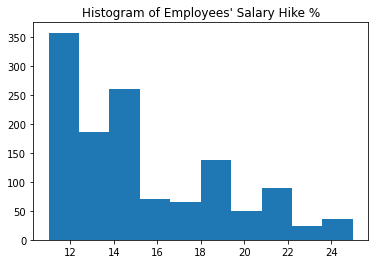

In [19]:
plt.hist(employee_attr['PercentSalaryHike'],bins=10)
plt.title("Histogram of Employees' Salary Hike %")
plt.show() 

Percentage increase in salary
- I don't think this variable is very useful as the percentage increase in salary usually depends on multiple factors such as the company's overall yearly performance, an employee's performance reviews, etc.
- In terms of determining why an employee would leave a company, I think yearly income is more of a telling sign than percentage increase. Therefore, I am going to remove this variable.

In [20]:
employee_attr = employee_attr.drop('PercentSalaryHike',1)
employee_attr

C:\Users\phill\AppData\Local\Temp/ipykernel_171628/4138168910.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  employee_attr = employee_attr.drop('PercentSalaryHike',1)


Age Attrition     BusinessTravel              Department  \
0      41       Yes      Travel_Rarely                   Sales   
1      49        No  Travel_Frequently  Research & Development   
2      37       Yes      Travel_Rarely  Research & Development   
3      33        No  Travel_Frequently  Research & Development   
4      27        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
1465   36        No  Travel_Frequently  Research & Development   
1466   39        No      Travel_Rarely  Research & Development   
1467   27        No      Travel_Rarely  Research & Development   
1468   49        No  Travel_Frequently                   Sales   
1469   34        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education  EmployeeNumber  EnvironmentSatisfaction  \
0                    1          2               1                        2   
1                    8          1               2                        3   
2                    2          2               4                        4   
3                    3          4               5                        4   
4                    2          1               7                        1   
...                ...        ...             ...                      ...   
1465                23          2            2061                        3   
1466                 6          1            2062                        4   
1467                 4          3            2064                        2   
1468                 2          3            2065                        4   
1469                 8          3            2068                        2   

      Gender  JobInvolvement  JobLevel                    JobRole  \
0     Female               3         2            Sales Executive   
1       Male               2         2         Research Scientist   
2       Male               2         1      Laboratory Technician   
3     Female               3         1         Research Scientist   
4       Male               3         1      Laboratory Technician   
...      ...             ...       ...                        ...   
1465    Male               4         2      Laboratory Technician   
1466    Male               2         3  Healthcare Representative   
1467    Male               4         2     Manufacturing Director   
1468    Male               2         2            Sales Executive   
1469    Male               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0                   4        Single           5993                   8   
1                   2       Married           5130                   1   
2                   3        Single           2090                   6   
3                   3       Married           2909                   1   
4                   2       Married           3468                   9   
...               ...           ...            ...                 ...   
1465                4       Married           2571                   4   
1466                1       Married           9991                   4   
1467                2       Married           6142                   1   
1468                2       Married           5390                   2   
1469                3       Married           4404                   2   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3            

<AxesSubplot:>

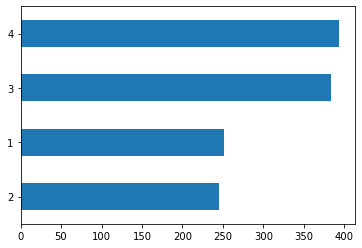

In [21]:
#bar chart of employees' job satisfaction ratings
employee_attr.JobSatisfaction.value_counts().sort_values().plot(kind = 'barh')

Most employees rated highly on the survery for job satisfaction, with most employees giving it a 3 or a 4 on the 1-4 scale. That is pretty good for the number of employees! 

I think though from the company's perspective, they should put efforts towards checking in on the employees with lower scores since they could be the ones at a higher risk for leaving.

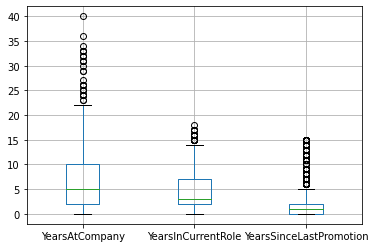

In [22]:
#Boxplots to check for outliers
boxplot = employee_attr.boxplot(column=['YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion'])

#Distributions are not completely normal -- slight skew to the right (higher end of scale with longer tails)

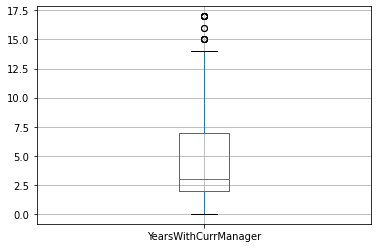

In [23]:
boxplot = employee_attr.boxplot(column=['YearsWithCurrManager'])

When looking at the years variables, it is tough to say if any entries are outliers, since employees often do and are even supposed to have varying years of experience at a company and within their career. At my company, there are employees with 35+ years, while I have less than a year, so I wouldn't say any of these outliers above the top of the boxplots are out of the ordinary or need to be removed. 

#### Categorical Data Analysis

In [24]:
#looking at differences in incomes between departments
employee_attr.groupby(['Department'])['YearlyIncome'].median()

Department
Human Resources           59232.0
Research & Development    53040.0
Sales                     70428.0
Name: YearlyIncome, dtype: float64

The departments at a company can pay their employees varying levels of salaries. According to this dataset though, there is not a huge/significant difference in the average yearly incomes between the three distinct departments at IBM: Human Resources, Research & Development and Sales.

[Text(0, 0, 'College'),
 Text(1, 0, 'Below College'),
 Text(2, 0, 'Master'),
 Text(3, 0, 'Bachelor'),
 Text(4, 0, 'Doctor')]

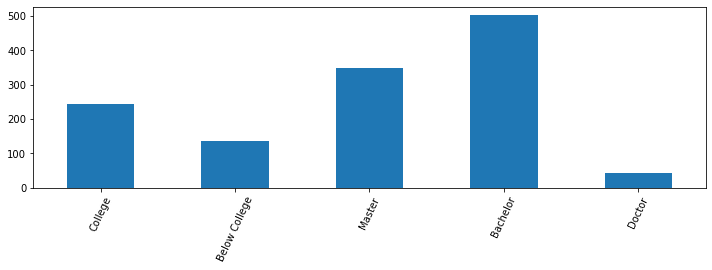

In [25]:
x = employee_attr['Education'].unique()
y = employee_attr['Education'].value_counts()
s = pd.Series(y, index=x)

#indexes
idx = np.asarray([i for i in range(len(x))])
#names
education = ['College','Below College','Master','Bachelor','Doctor']

ax = s.plot(kind='bar', figsize=(10, 3))
ax.figure.tight_layout()
ax.set_xticks(idx)
ax.set_xticklabels(education, rotation=65)

In [26]:
#Looking at data with Doctorate degree -- see what field they contribute to
doctor = employee_attr[employee_attr.Education == 5]
doctor

Age Attrition     BusinessTravel              Department  \
52     44        No      Travel_Rarely                   Sales   
56     35        No  Travel_Frequently                   Sales   
61     38        No  Travel_Frequently  Research & Development   
142    38        No      Travel_Rarely  Research & Development   
151    35        No      Travel_Rarely                   Sales   
169    32        No      Travel_Rarely  Research & Development   
208    40        No         Non-Travel  Research & Development   
329    47        No      Travel_Rarely  Research & Development   
348    42        No      Travel_Rarely  Research & Development   
358    36        No         Non-Travel                   Sales   
398    37        No         Non-Travel  Research & Development   
421    29       Yes      Travel_Rarely  Research & Development   
444    48        No      Travel_Rarely                   Sales   
445    55        No      Travel_Rarely                   Sales   
455    33        No      Travel_Rarely  Research & Development   
466    41        No      Travel_Rarely                   Sales   
491    43        No  Travel_Frequently  Research & Development   
503    34        No      Travel_Rarely  Research & Development   
545    30        No      Travel_Rarely                   Sales   
559    38        No      Travel_Rarely  Research & Development   
560    34        No      Travel_Rarely  Research & Development   
786    27        No         Non-Travel  Research & Development   
878    42        No         Non-Travel         Human Resources   
887    42        No  Travel_Frequently  Research & Development   
1014   31        No      Travel_Rarely  Research & Development   
1026   32        No      Travel_Rarely                   Sales   
1028   41        No      Travel_Rarely  Research & Development   
1033   31       Yes  Travel_Frequently  Research & Development   
1051   44        No  Travel_Frequently                   Sales   
1074   33        No      Travel_Rarely  Research & Development   
1086   50        No  Travel_Frequently  Research & Development   
1116   55        No      Travel_Rarely                   Sales   
1138   50        No  Travel_Frequently  Research & Development   
1142   45        No      Travel_Rarely  Research & Development   
1148   39        No      Travel_Rarely  Research & Development   
1150   35        No      Travel_Rarely  Research & Development   
1165   44        No  Travel_Frequently         Human Resources   
1166   48        No  Travel_Frequently  Research & Development   
1177   50        No      Travel_Rarely  Research & Development   
1184   54        No      Travel_Rarely  Research & Development   
1236   36       Yes      Travel_Rarely                   Sales   
1371   56        No      Travel_Rarely                   Sales   

      DistanceFromHome  Education  EmployeeNumber  EnvironmentSatisfaction  \
52                   1          5              68                        2   
56                  18          5              74                        2   
61                  29          5              79                        4   
142                  3          5             193                        4   
151                  1          5             204                        3   
169                  6          5             231                        3   
208                  9          5             287                        4   
329                  5          5             447                        4   
348                 23          5             468                        1   
358                  1          5             479                        4   
398                 25          5             529                        2   
421                 25          5             565                        3   
444                  2          5             595                        2   
445                 18          5             597                        1 

In [27]:
print(doctor.shape)
#48 rows

(42, 27)


The sample of employees with education "Below College" would be interesting to explore as you usually don't expect these people to have as many years at a company or if any job/career at all, but this is definitely a bias that I have learned from my education as well.

#### Target Variable

In [28]:
employee_attr['Attrition'].value_counts()

No     1059
Yes     214
Name: Attrition, dtype: int64

Text(0, 0.5, 'Value Counts')

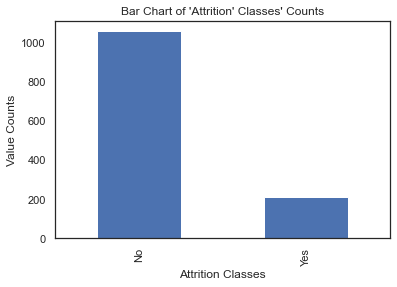

In [94]:
employee_attr['Attrition'].value_counts().plot(kind='bar')
plt.title("Bar Chart of 'Attrition' Classes' Counts")
plt.xlabel('Attrition Classes')
plt.ylabel('Value Counts')

### PMFs, CDFs

In [30]:
employee_attr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
YearlyIncome                 int64
dtype: object

Separating the Employee Attrition dataset into two subsets: one for employees that have left the company (Yes) and one for employees that are still with the company (No)

In [31]:
attrition_yes = employee_attr[employee_attr.Attrition == "Yes"]
attrition_yes.shape
#237 rows, 35 columns

(214, 27)

In [32]:
attrition_no = employee_attr[employee_attr.Attrition == "No"]
attrition_no.shape
#1233 rows, 35 columns

(1059, 27)

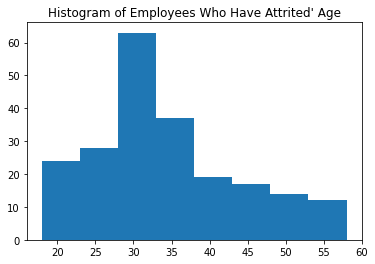

In [33]:
plt.hist(attrition_yes.Age,bins=8)
plt.title("Histogram of Employees Who Have Attrited' Age")
plt.show() 

- Close attention on 30 & 35 year olds

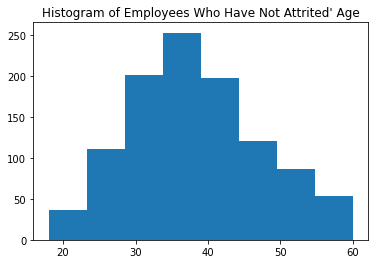

In [34]:
plt.hist(attrition_no.Age,bins=8)
plt.title("Histogram of Employees Who Have Not Attrited' Age")
plt.show() 

The distribution of age for both datasets is relatively left-skewed; more employees are at the younger end of the age scale around 25-35 years old. There are few employees past the age of 45 years or so. Therefore, in both groups, we can see some overlap in age distributions, which could potentially show that age does not play as impactful of a factor in whethere there is employee attrition at a company.

In [35]:
data =attrition_yes.Age
count, bins_count = np.histogram(data, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

In [36]:
data2 =attrition_no.Age
count2, bins_count2 = np.histogram(data2, bins=10)
pdf2 = count / sum(count2)
cdf2 = np.cumsum(pdf2)

Text(0.5, 0, 'Attrition No: Age')

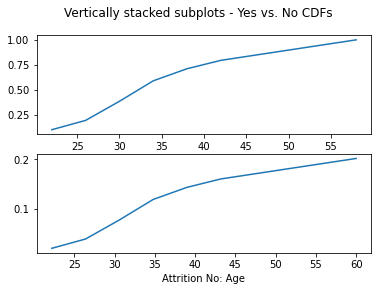

In [37]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots - Yes vs. No CDFs')
axs[0].plot(bins_count[1:], cdf, label="CDF")
axs[0].set_xlabel('Attrition Yes: Age')
axs[1].plot(bins_count2[1:], cdf2, label="CDF")
axs[1].set_xlabel('Attrition No: Age')

From looking at the CDFs for Age in terms of 'yes' or 'no' employee attrition, they have more spread from about ages 25-45, which is when the employees who left the company were more likely to be those ages or younger than the "no" group or the employees who chose at the stay company. Therefore, this could show for that age range that it's a more popular time for employees to choose to leave a company, which would make sense given that it's a defining time in people's lives and people are told to explore and experiment more in their careers.

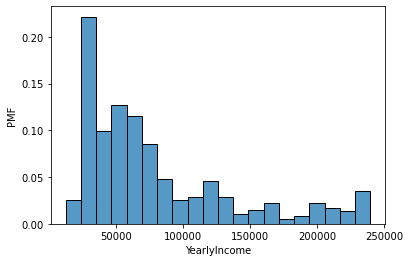

In [38]:
#PMF of Yearly Income
plt.ylabel('PMF')
sns.histplot(employee_attr['YearlyIncome'], stat='probability', bins=20);

In [39]:
#creating CDF data for attrition yes YearlyIncome
data_income =attrition_yes.YearlyIncome
count_income, bins_count_income = np.histogram(data_income, bins=10)
pdf_income = count_income / sum(count_income)
cdf_income = np.cumsum(pdf_income)

In [40]:
#creating CDF data for attrition no YearlyIncome
data_income2 =attrition_no.YearlyIncome
count_income2, bins_count_income2 = np.histogram(data_income2, bins=10)
pdf_income2 = count_income2 / sum(count_income2)
cdf_income2 = np.cumsum(pdf_income2)

Text(0.5, 0, 'Attrition No: YearlyIncome')

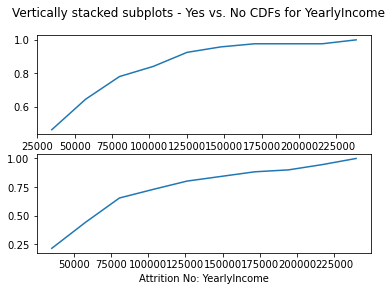

In [41]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots - Yes vs. No CDFs for YearlyIncome')
axs[0].plot(bins_count_income[1:], cdf_income, label="Yes")
axs[0].set_xlabel('Attrition Yes: YearlyIncome')
axs[1].plot(bins_count_income2[1:], cdf_income2, label="No")
axs[1].set_xlabel('Attrition No: YearlyIncome')

Comparing the Yearly Income distributions between "yes" attribution and "no" attribution -- won't be misled by sample size

Throughout the CDFs of yearly income, the "yes" group is at a higher percentile than the "no" group for the income range values. Therefore, at any point, the employees who left the company are more likely to be making that salary or less than the other group. The people who left the company are judged to usually be making more money than the others who stayed, which is interesting given that I thought they would leave to make more moeney elsewhere. 

#### Job Satisfaction

Text(0, 0.5, 'Number of Employees')

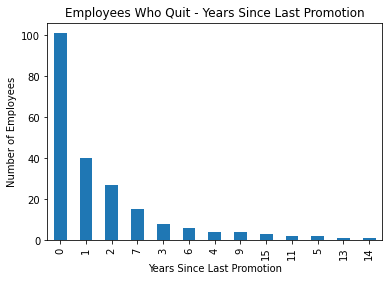

In [42]:
attrition_yes['YearsSinceLastPromotion'].value_counts().plot(kind='bar')
plt.title("Employees Who Quit - Years Since Last Promotion")
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Number of Employees")

Text(0, 0.5, 'Number of Employees')

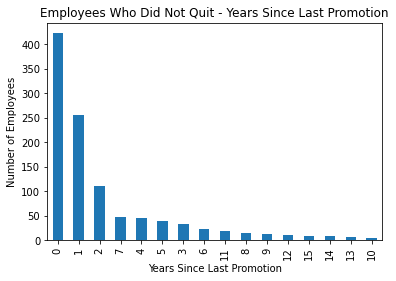

In [43]:
attrition_no['YearsSinceLastPromotion'].value_counts().plot(kind='bar')
plt.title("Employees Who Did Not Quit - Years Since Last Promotion")
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Number of Employees")

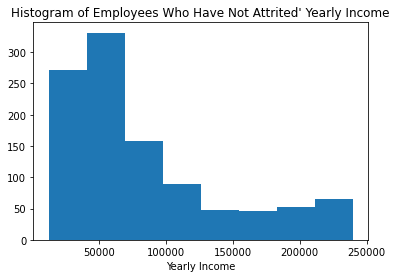

In [44]:
plt.hist(attrition_no.YearlyIncome,bins=8)
plt.title("Histogram of Employees Who Have Not Attrited' Yearly Income")
plt.xlabel("Yearly Income")
plt.show() 

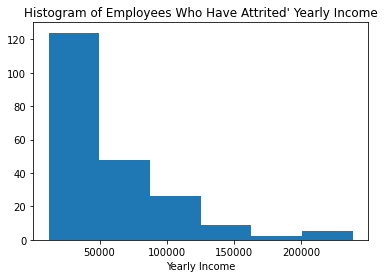

In [45]:
plt.hist(attrition_yes.YearlyIncome,bins=6)
plt.title("Histogram of Employees Who Have Attrited' Yearly Income")
plt.xlabel("Yearly Income")
plt.show() 

### Relationship between Variables

<AxesSubplot:>

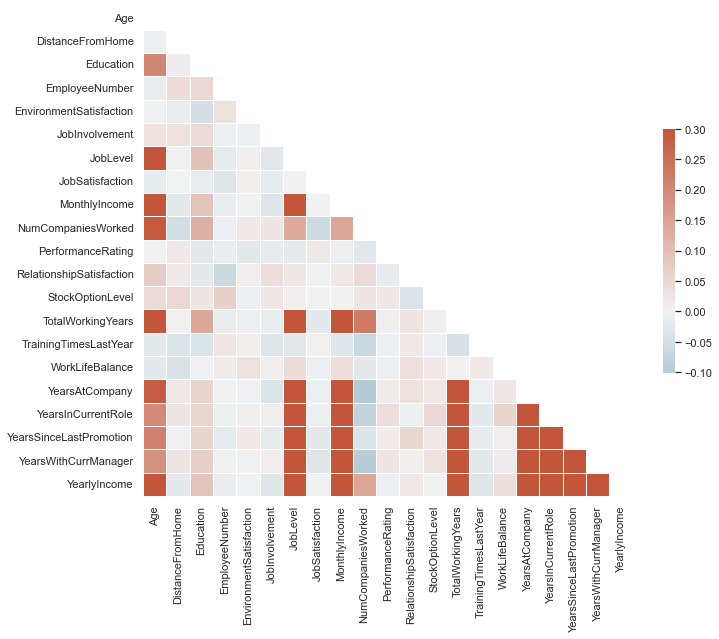

In [46]:
#creating correlation plot for all variables in employee_attr
sns.set_theme(style="white")
# Compute the correlation matrix
corr = employee_attr.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

None of the correlations are very strong in the negative or positive direction.

The most positive correlation is around 0.30, and the most negative correlation is a little less than -0.10. Since one is the most positive correlation and negative one is the most negative correlation in terms of overall correlation plots, I am not overally concerned about any of these correlations between variables in the dataset.

### Feature Reduction

### Dropping Unhelpful Features

- EmployeeNumber --> acts as an ID columns, not needed in relation to the 'Attrition' target variable
- MonthlyIncome --> since I created the YearlyIncome column, we can drop the MonthlyIncome column since it was just used to derive a variable of more meaning to the problem
- TrainingTimesLastYear --> there is not much variety in this variable, and I personally don't think it is important to the business problem at hand since training is mostly handled at a HR-standpoint and is just a common thing that employees have to perform every now and then
- BusinessTravel --> most of the employees in this dataset fell into the 'Travel_Rarely' category, and given the skew in the different classes of the predictor variable, I do not think it will add much value to the classification work.
- JobRole --> since there is also JobLevel in the dataset, I think the level variable will be more telling of a person's "status" in the company compared to the title of their positions. Titles do not bring as much value in comparison to the level in which someone helds in an organization.

In [47]:
#dropping columns from dataframe
employee_attr = employee_attr.drop(columns=['EmployeeNumber','MonthlyIncome','TrainingTimesLastYear','BusinessTravel','JobRole'])

In [48]:
employee_attr.shape

(1273, 22)

### One-Hot Encoding for Non-Numerical Variables

In [49]:
employee_attr.dtypes

Age                          int64
Attrition                   object
Department                  object
DistanceFromHome             int64
Education                    int64
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
MaritalStatus               object
NumCompaniesWorked           int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
YearlyIncome                 int64
dtype: object

The following categorical variables will need to be encoded for use in modeling: Attrition, Department, Gender, MaritalStatus.

In [50]:
from sklearn.preprocessing import LabelEncoder

#### Attrition

In [51]:
#diagnosis
cat_cols = ['Attrition','Department','Gender','MaritalStatus']

#turning categories into their numerical counterparts using LabelEncoder
for var in cat_cols:
    number = LabelEncoder()
    employee_attr[var+"cat"] = number.fit_transform(employee_attr[var].astype('str'))

In [52]:
employee_attr[['Attrition','Attritioncat','Department','Departmentcat','Gender','Gendercat','MaritalStatus','MaritalStatuscat']]

Attrition  Attritioncat              Department  Departmentcat  Gender  \
0          Yes             1                   Sales              2  Female   
1           No             0  Research & Development              1    Male   
2          Yes             1  Research & Development              1    Male   
3           No             0  Research & Development              1  Female   
4           No             0  Research & Development              1    Male   
...        ...           ...                     ...            ...     ...   
1465        No             0  Research & Development              1    Male   
1466        No             0  Research & Development              1    Male   
1467        No             0  Research & Development              1    Male   
1468        No             0                   Sales              2    Male   
1469        No             0  Research & Development              1    Male   

      Gendercat MaritalStatus  MaritalStatuscat  
0             0        Single                 2  
1             1       Married                 1  
2             1        Single                 2  
3             0       Married                 1  
4             1       Married                 1  
...         ...           ...               ...  
1465          1       Married                 1  
1466          1       Married                 1  
1467          1       Married                 1  
1468          1       Married                 1  
1469          1       Married                 1  

[1273 rows x 8 columns]

In [53]:
employee_attr['Department'].value_counts()

Research & Development    841
Sales                     381
Human Resources            51
Name: Department, dtype: int64

In [54]:
employee_attr['Departmentcat'].value_counts()

1    841
2    381
0     51
Name: Departmentcat, dtype: int64

In [55]:
employee_attr['Gender'].value_counts()

Male      757
Female    516
Name: Gender, dtype: int64

In [56]:
employee_attr['MaritalStatus'].value_counts()

Married     577
Single      403
Divorced    293
Name: MaritalStatus, dtype: int64

In [57]:
employee_attr['MaritalStatuscat'].value_counts()

1    577
2    403
0    293
Name: MaritalStatuscat, dtype: int64

Conversions:

- Attrition
    - Yes = 1
    - No = 0
- Department
    - Research & Development = 1
    - Sales = 2
    - Human Resources = 0
- Gender
    - Female = 0
    - Male = 1
- MaritalStatus
    - Married = 1
    - Single = 2
    - Divorced = 0

In [58]:
#dropping non-numerical columns
employee_attr = employee_attr.drop(columns=['Department','Gender','MaritalStatus'])
#keeping regular Attrition variable since it is used for later classification analysis

### Modeling - All Features

#### Normalizing the Data

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [60]:
#matrices of features
X = employee_attr.drop(labels=['Attritioncat','Attrition'],axis=1)
y = employee_attr['Attritioncat']
col=X.columns

In [61]:
X.shape

(1273, 21)

#### Handling Imbalanced Target Classes

Random Over-Sampling
- Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.
- One way to fight imbalance data is to generate new samples in the minority classes. The most naive strategy is to generate new samples by randomly sampling with replacement of the currently available samples. The RandomOverSampler offers such a scheme.

In [62]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
# define pipeline
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.762


In [63]:
#train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 10)

#### Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

np.random.seed()
forest = RandomForestClassifier(n_estimators=1000)
fit = forest.fit(X_train,y_train)
accuracy = fit.score(X_test,y_test)
predict = fit.predict(X_test)
cmatrix = confusion_matrix(y_test,predict)

print('Accuracy of Random Forest: %s'% "{0:.2%}".format(accuracy))

Accuracy of Random Forest: 84.31%


#### K-Nearest Neighbor

Straight forward pattern recognition model which allows the testing of several k values and leaf sizes to determine the best performance

In [65]:
# Decide what k should be for KNN
knn = KNeighborsClassifier()

k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options, 'algorithm': algorithm}

In [66]:
rand_knn = RandomizedSearchCV(knn, param_grid, cv=10, scoring="accuracy", n_iter=100, random_state=42)
rand_knn.fit(X_train,y_train.values.ravel())

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
            

#### Naive Bayes

Calculates the possibility of whether a data point belongs within a certain category or does not

In [67]:
gnb = GaussianNB()
gnb_scores = cross_val_score(gnb, X_train, y_train.values.ravel(), cv=10, scoring='accuracy')

### Decision Tree Classifier
A decision tree is a supervised learning algorithm that performs strong in classification problems

In [68]:
dt_clf = DecisionTreeClassifier(random_state=42)

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': sp_randint(2, 21), 
              'min_samples_leaf': sp_randint(1, 21)}

In [69]:
rand_dt = RandomizedSearchCV(dt_clf, param_grid, cv=10, scoring="accuracy", n_iter=100, random_state=42)
rand_dt.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000242634ED520>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000242635088B0>},
                   random_state=42, scoring='accuracy')

### Random Forest Classifier
Expands beyond a decision tree by constructing multiple decision trees to remediate forcing a binary decision

In [70]:
rf_clf = RandomForestClassifier(random_state=42)

param_grid = {"max_depth": [3, None],
              "max_features":  sp_randint(1, 21),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [71]:
rand_rf = RandomizedSearchCV(rf_clf, param_distributions=param_grid, n_iter=100, random_state=42)
rand_rf.fit(X_train,y_train.values.ravel())

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002426237C700>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002426237C940>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000242622E20D0>},
                   random_state=42)

### Modeling Results - All Features

In [72]:
#Summary of performance results
print("-"*100)
print("KNN Results")
print("Best Accuracy :",rand_knn.best_score_)
print("Best Parameters :",rand_knn.best_params_)
print("Best Estimator :",rand_knn.best_estimator_)
print("-"*100)
print("Naive Bayes Results")
print("Mean Accuracy :",gnb_scores.mean())
print("-"*100)
print("Decision Tree Classifier Results")
print("Best Accuracy :",rand_dt.best_score_)
print("Best Parameters :",rand_dt.best_params_)
print("Best Estimator :",rand_dt.best_estimator_)
print("-"*100)
print("Random Forest Classification Results")
print("Best Accuracy :",rand_rf.best_score_)
print("Best Parameters :",rand_rf.best_params_)
print("Best Estimator :",rand_rf.best_estimator_)
print("-"*100)

----------------------------------------------------------------------------------------------------
KNN Results
Best Accuracy : 0.8310231023102309
Best Parameters : {'weights': 'uniform', 'n_neighbors': 21, 'leaf_size': 25, 'algorithm': 'kd_tree'}
Best Estimator : KNeighborsClassifier(algorithm='kd_tree', leaf_size=25, n_neighbors=21)
----------------------------------------------------------------------------------------------------
Naive Bayes Results
Mean Accuracy : 0.7386915162104446
----------------------------------------------------------------------------------------------------
Decision Tree Classifier Results
Best Accuracy : 0.8408755581440497
Best Parameters : {'max_features': 'sqrt', 'min_samples_leaf': 18, 'min_samples_split': 13}
Best Estimator : DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=18,
                       min_samples_split=13, random_state=42)
----------------------------------------------------------------------------------------------------


In [73]:
fit_knn = rand_knn.fit(X_train,y_train)
predict_knn = fit_knn.predict(X_test)
cmatrix_knn = confusion_matrix(y_test,predict_knn)

fit_gnb = gnb.fit(X_train,y_train)
predict_gnb = fit_gnb.predict(X_test)
cmatrix_gnb = confusion_matrix(y_test,predict_gnb)

fit_dt = rand_dt.fit(X_train,y_train)
predict_dt = fit_dt.predict(X_test)
cmatrix_dt = confusion_matrix(y_test,predict_dt)

fit_rf = rand_rf.fit(X_train,y_train)
predict_rf = fit_rf.predict(X_test)
cmatrix_rf = confusion_matrix(y_test,predict_rf)

In [74]:
#rows = actual, col = pred

#compute tp, tp_and_fn and tp_and_fp w.r.t all classes

#knn
tp_and_fn_knn = cmatrix_knn.sum(1)
tp_and_fp_knn = cmatrix_knn.sum(0)
tp_knn = cmatrix_knn.diagonal()

precision_knn = tp_knn / tp_and_fp_knn
recall_knn = tp_knn / tp_and_fn_knn

#naive bayes

tp_and_fn_gnb = cmatrix_gnb.sum(1)
tp_and_fp_gnb = cmatrix_gnb.sum(0)
tp_gnb = cmatrix_gnb.diagonal()

precision_gnb = tp_gnb / tp_and_fp_gnb
recall_gnb = tp_gnb / tp_and_fn_gnb

#decision tree
tp_and_fn_dt = cmatrix_dt.sum(1)
tp_and_fp_dt = cmatrix_dt.sum(0)
tp_dt = cmatrix_dt.diagonal()

precision_dt = tp_dt / tp_and_fp_dt
recall_dt = tp_dt / tp_and_fn_dt

#random forest

tp_and_fn_rf = cmatrix_rf.sum(1)
tp_and_fp_rf = cmatrix_rf.sum(0)
tp_rf = cmatrix_rf.diagonal()

precision_rf = tp_rf / tp_and_fp_rf
recall_rf = tp_rf / tp_and_fn_rf

In [75]:
print("-"*100)
print("KNN Confusion Matrix")
print(cmatrix_knn)
print('Precision: ',precision_knn)
print('Recall: ',recall_knn)
print("-"*100)
print("Gaussian Naive Bayes Confusion Matrix")
print(cmatrix_gnb)
print('Precision: ',precision_gnb)
print('Recall: ',recall_gnb)
print("-"*100)
print("Decision Tree Confusion Matrix")
print(cmatrix_dt)
print('Precision: ',precision_dt)
print('Recall: ',recall_dt)
print("-"*100)
print("Random Forest Confusion Matrix")
print(cmatrix_rf)
print('Precision: ',precision_rf)
print('Recall: ',recall_rf)
print("-"*100)

----------------------------------------------------------------------------------------------------
KNN Confusion Matrix
[[210   3]
 [ 39   3]]
Precision:  [0.84337349 0.5       ]
Recall:  [0.98591549 0.07142857]
----------------------------------------------------------------------------------------------------
Gaussian Naive Bayes Confusion Matrix
[[162  51]
 [ 21  21]]
Precision:  [0.8852459  0.29166667]
Recall:  [0.76056338 0.5       ]
----------------------------------------------------------------------------------------------------
Decision Tree Confusion Matrix
[[199  14]
 [ 36   6]]
Precision:  [0.84680851 0.3       ]
Recall:  [0.9342723  0.14285714]
----------------------------------------------------------------------------------------------------
Random Forest Confusion Matrix
[[208   5]
 [ 35   7]]
Precision:  [0.85596708 0.58333333]
Recall:  [0.97652582 0.16666667]
----------------------------------------------------------------------------------------------------


### Modeling - Feature Reduction

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.06784578 0.06047402 0.044115   0.05621498 0.05099056 0.03897116
 0.05013966 0.04708432 0.02019002 0.0496414  0.04202116 0.0573941
 0.04700581 0.04949186 0.04617254 0.04616665 0.04790147 0.06430222
 0.0387749  0.0295029  0.0455995 ]


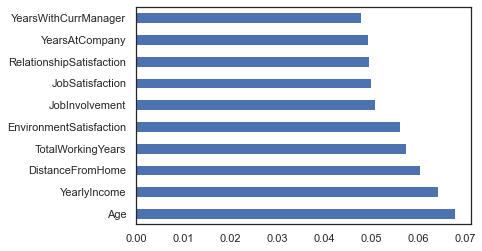

In [76]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

From using the feature importance method for feature reduction, the following attributes were ranked as the top ten important features from the dataset: Age, DistanceFromHome, EnvironmentSatisfaction, YearlyIncome, JobInvolvement, TotalWorkingYears, JobSatisfaction, NumCompaniesWorked, YearsAtCompany and WorkLifeBalance.

I am going to create a separate DataFrame with just these features and the 'Attrition' target variable to see how it compares to modeling with all of the features.

#### Defining Reduced Datasets

1. Four features --> JobSatisfaction, YearsWithCurrManager, YearlyIncome, YearsSinceLastPromotion

2. Two features --> YearlyIncome, JobSatisfaction

In [77]:
employee_reduced = employee_attr[['Attritioncat','YearlyIncome','JobSatisfaction']]

In [78]:
employee_reduced.head()

Attritioncat  YearlyIncome  JobSatisfaction
0             1         71916                4
1             0         61560                2
2             1         25080                3
3             0         34908                3
4             0         41616                2

In [79]:
employee_reduced2 = employee_attr[['Attritioncat','JobSatisfaction','YearsWithCurrManager','YearlyIncome','YearsSinceLastPromotion']]

In [93]:
employee_reduced2[['JobSatisfaction','YearsWithCurrManager','YearlyIncome','YearsSinceLastPromotion']].describe()

JobSatisfaction  YearsWithCurrManager   YearlyIncome  \
count      1273.000000           1273.000000    1273.000000   
mean          2.722702              4.018853   79330.812255   
std           1.102140              3.590863   57494.432802   
min           1.000000              0.000000   12108.000000   
25%           2.000000              2.000000   34932.000000   
50%           3.000000              3.000000   60804.000000   
75%           4.000000              7.000000  103452.000000   
max           4.000000             17.000000  239676.000000   

       YearsSinceLastPromotion  
count              1273.000000  
mean                  2.165750  
std                   3.251031  
min                   0.000000  
25%                   0.000000  
50%                   1.000000  
75%                   2.000000  
max                  15.000000

#### Creating Training & Test Sets

In [80]:
#matrices of features
X_reduced = employee_reduced2.drop(labels=['Attritioncat'],axis=1)
y_reduced = employee_reduced2['Attritioncat']
col=X_reduced.columns

In [81]:
#train, test, split
from sklearn.model_selection import train_test_split
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced,y_reduced,test_size=0.2,random_state= 10)

In [82]:
# define pipeline
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_reduced, y_reduced, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.752


#### Modeling

In [83]:
np.random.seed()
forest_red = RandomForestClassifier(n_estimators=1000)
fit_red = forest.fit(X_train_red,y_train_red)
accuracy_red = fit.score(X_test_red,y_test_red)
predict_red = fit.predict(X_test_red)
cmatrix_red = confusion_matrix(y_test_red,predict_red)

print('Accuracy of Random Forest: %s'% "{0:.2%}".format(accuracy_red))

Accuracy of Random Forest: 80.39%


In [84]:
#defining parameters

# Decide what k should be for KNN
knn = KNeighborsClassifier()

k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options, 'algorithm': algorithm}

#k-nn modeling on reduced dataset
rand_knn_reduced = RandomizedSearchCV(knn, param_grid, cv=10, scoring="accuracy", n_iter=100, random_state=42)
rand_knn_reduced.fit(X_train_red,y_train_red.values.ravel())

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
            

In [85]:
gnb_reduced = GaussianNB()
gnb_scores_reduced = cross_val_score(gnb_reduced, X_reduced, y_reduced.values.ravel(), cv=10, scoring='accuracy')

In [86]:
dt_clf_reduced = DecisionTreeClassifier(random_state=42)

param_grid_reduced = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': sp_randint(2, 10), 
              'min_samples_leaf': sp_randint(1, 10)}

In [87]:
rand_dt_reduced = RandomizedSearchCV(dt_clf_reduced, param_grid_reduced, cv=10, scoring="accuracy", n_iter=100, random_state=42)
rand_dt_reduced.fit(X_train_red,y_train_red)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002426232CC10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000242600EC8E0>},
                   random_state=42, scoring='accuracy')

#### Modeling Evaluation

In [88]:
#Summary of performance results
print("-"*100)
print("KNN Results - Reduced Features")
print("Best Accuracy :",rand_knn_reduced.best_score_)
print("Best Parameters :",rand_knn_reduced.best_params_)
print("Best Estimator :",rand_knn_reduced.best_estimator_)
print("-"*100)
print("Naive Bayes Results - Reduced Features")
print("Mean Accuracy :",gnb_scores_reduced.mean())
print("-"*100)
print("Decision Tree Classifier Results - Reduced Features")
print("Best Accuracy :",rand_dt_reduced.best_score_)
print("Best Parameters :",rand_dt_reduced.best_params_)
print("Best Estimator :",rand_dt_reduced.best_estimator_)
print("-"*100)
print("Random Forest Classification Results")
print('Accuracy of Random Forest: %s'% "{0:.2%}".format(accuracy_red))
print("-"*100)

----------------------------------------------------------------------------------------------------
KNN Results - Reduced Features
Best Accuracy : 0.8300524170064065
Best Parameters : {'weights': 'uniform', 'n_neighbors': 23, 'leaf_size': 1, 'algorithm': 'ball_tree'}
Best Estimator : KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=23)
----------------------------------------------------------------------------------------------------
Naive Bayes Results - Reduced Features
Mean Accuracy : 0.8319020669291339
----------------------------------------------------------------------------------------------------
Decision Tree Classifier Results - Reduced Features
Best Accuracy : 0.83003300330033
Best Parameters : {'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 7}
Best Estimator : DecisionTreeClassifier(max_features='log2', min_samples_leaf=9,
                       min_samples_split=7, random_state=42)
------------------------------------------------

By reducing the dataset to only include the top ten important features (also tried a scenario with top two important features), it did not cause a significant change in difference for the modeling results from including all of the features.

Therefore, it makes me wonder if all of the features in the 'employee_attr' are critical to the question of predicting whether an employee will attrite from an organization, in comparison to just a few. 

In [89]:
fit_knn_red = rand_knn_reduced.fit(X_train_red,y_train_red)
predict_knn_red = fit_knn_red.predict(X_test_red)
cmatrix_knn_red = confusion_matrix(y_test_red,predict_knn_red)

fit_gnb_red = gnb_reduced.fit(X_train_red,y_train_red)
predict_gnb_red = fit_gnb_red.predict(X_test_red)
cmatrix_gnb_red = confusion_matrix(y_test_red,predict_gnb_red)

fit_dt_red = rand_dt_reduced.fit(X_train_red,y_train_red)
predict_dt_red = fit_dt_red.predict(X_test_red)
cmatrix_dt_red = confusion_matrix(y_test_red,predict_dt_red)

fit_rf_red = forest_red.fit(X_train_red,y_train_red)
predict_rf_red = fit_rf_red.predict(X_test_red)
cmatrix_rf_red = confusion_matrix(y_test_red,predict_rf_red)

In [90]:
#rows = actual, col = pred

#compute tp, tp_and_fn and tp_and_fp w.r.t all classes

#knn
tp_and_fn_knn_red = cmatrix_knn_red.sum(1)
tp_and_fp_knn_red = cmatrix_knn_red.sum(0)
tp_knn_red = cmatrix_knn_red.diagonal()

precision_knn_red = tp_knn_red / tp_and_fp_knn_red
recall_knn_red = tp_knn_red / tp_and_fn_knn_red

#naive bayes

tp_and_fn_gnb_red = cmatrix_gnb_red.sum(1)
tp_and_fp_gnb_red = cmatrix_gnb_red.sum(0)
tp_gnb_red = cmatrix_gnb_red.diagonal()

precision_gnb_red = tp_gnb_red / tp_and_fp_gnb_red
recall_gnb_red = tp_gnb_red / tp_and_fn_gnb_red

#decision tree
tp_and_fn_dt_red = cmatrix_dt_red.sum(1)
tp_and_fp_dt_red = cmatrix_dt_red.sum(0)
tp_dt_red = cmatrix_dt_red.diagonal()

precision_dt_red = tp_dt_red / tp_and_fp_dt_red
recall_dt_red = tp_dt_red / tp_and_fn_dt_red

#random forest

tp_and_fn_rf_red = cmatrix_rf_red.sum(1)
tp_and_fp_rf_red = cmatrix_rf_red.sum(0)
tp_rf_red = cmatrix_rf_red.diagonal()

precision_rf_red = tp_rf_red / tp_and_fp_rf_red
recall_rf_red = tp_rf_red / tp_and_fn_rf_red

C:\Users\phill\AppData\Local\Temp/ipykernel_171628/3542382570.py:19: RuntimeWarning: invalid value encountered in true_divide
  precision_gnb_red = tp_gnb_red / tp_and_fp_gnb_red


In [91]:
print("-"*100)
print("KNN Confusion Matrix")
print(cmatrix_knn_red)
print('Precision: ',precision_knn_red)
print('Recall: ',recall_knn_red)
print("-"*100)
print("Gaussian Naive Bayes Confusion Matrix")
print(cmatrix_gnb_red)
print('Precision: ',precision_gnb_red)
print('Recall: ',recall_gnb_red)
print("-"*100)
print("Decision Tree Confusion Matrix")
print(cmatrix_dt_red)
print('Precision: ',precision_dt_red)
print('Recall: ',recall_dt_red)
print("-"*100)
print("Random Forest Confusion Matrix")
print(cmatrix_rf_red)
print('Precision: ',precision_rf_red)
print('Recall: ',recall_rf_red)
print("-"*100)

----------------------------------------------------------------------------------------------------
KNN Confusion Matrix
[[210   3]
 [ 39   3]]
Precision:  [0.84337349 0.5       ]
Recall:  [0.98591549 0.07142857]
----------------------------------------------------------------------------------------------------
Gaussian Naive Bayes Confusion Matrix
[[213   0]
 [ 42   0]]
Precision:  [0.83529412        nan]
Recall:  [1. 0.]
----------------------------------------------------------------------------------------------------
Decision Tree Confusion Matrix
[[208   5]
 [ 33   9]]
Precision:  [0.86307054 0.64285714]
Recall:  [0.97652582 0.21428571]
----------------------------------------------------------------------------------------------------
Random Forest Confusion Matrix
[[196  17]
 [ 33   9]]
Precision:  [0.8558952  0.34615385]
Recall:  [0.92018779 0.21428571]
----------------------------------------------------------------------------------------------------
